### Huggingface version of Llava 1.6 with Mistral 7b 

In [ ]:
!pip install transformers==4.38.1 accelerate --upgrade --quiet

The LLaVa model was proposed in Visual Instruction Tuning and improved in Improved Baselines with Visual Instruction Tuning by Haotian Liu, Chunyuan Li, Yuheng Li and Yong Jae Lee. 

The Huggingface SDK is provided here https://huggingface.co/docs/transformers/en/model_doc/llava

This notebook has been tested on Amazon SageMaker Notebook Instances with single GPU on ml.g5.2xlarge

In [1]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
import torch 

model_id = "llava-hf/llava-v1.6-mistral-7b-hf"

# you can also load from local file
#model_id = "llava-model/models--llava-hf--llava-v1.6-mistral-7b-hf/snapshots/4dbf61a5df5b38ec222b3acb12a947b5cef29312"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = LlavaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.float16, device_map=device)
processor = AutoProcessor.from_pretrained(model_id)

cuda


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of the model checkpoint at llava-hf/llava-v1.6-mistral-7b-hf were not used when initializing LlavaForConditionalGeneration: ['image_newline']
- This IS expected if you are initializing LlavaForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LlavaForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print(processor)

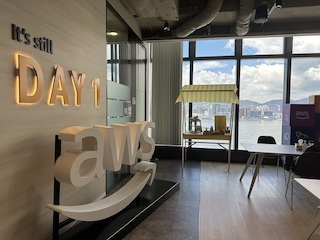

In [3]:
from PIL import Image

prompt = "<image>\nUSER: What's the content of the image in details?\nASSISTANT:"
image = Image.open("testAWS.jpg")
inputs = processor(text=prompt, images=image, return_tensors="pt")
inputs = inputs.to(device)
display(image)

In [5]:
# Generate
generate_ids = model.generate(**inputs,max_new_tokens = 300)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

'\nUSER: What\'s the content of the image in details?\nASSISTANT: The image shows an interior space that appears to be a modern office or co-working area. There is a large, illuminated sign on the wall that reads "AWS" in a stylized font. The sign is likely referring to Amazon Web Services, a popular cloud computing platform. In the background, there is a window with a view of a city skyline and a body of water, suggesting that the office is located in a high-rise building in an urban area. The room is well-lit and has a contemporary design, with a mix of natural and artificial lighting. There are also some pieces of furniture visible, including a table and chairs, which are arranged in a way that suggests a collaborative workspace. '